# 최근접 회귀

지도 학습 알고리즘은 크게 분류와 회귀로 나뉜다. 분류는 지금까지 계속 해왔던 그 알고리즘이다.

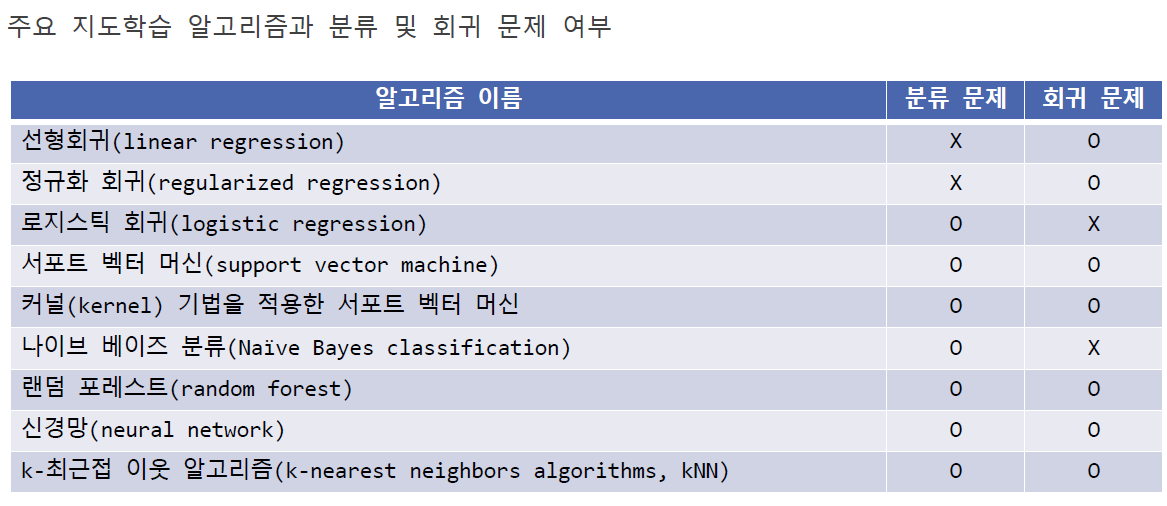

k-최근접 이웃 알고리즘이 회귀에도 작동, 이 알고리즘의 분류와 회귀에 적용되는 방식을 비교하겠다.

k-최근접 이웃 분류 알고리즘은 간단하다. 

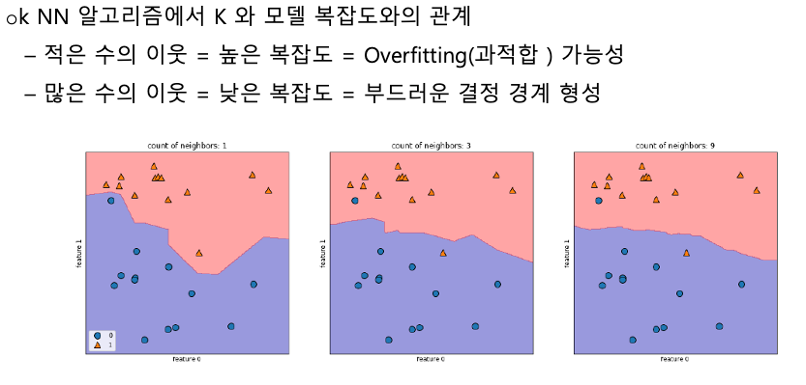

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# 산점도
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(perch_length, perch_weight, random_state=42)

2차원 데이터로 변환한다.

In [ ]:
train_input.shape, test_input.shape

In [ ]:
# 배열 크기 바꾸기
train_input = train_input.reshape(-1,1) # 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미이다.
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

이제 준비한 훈련 세트를 활용하여 k-최근접 이웃 알고리즘을 훈련 시켜보자.


## 학습 평가


In [ ]:
from sklearn.neighbors import KNeighborsRegressor # k-최근접 이웃 회귀 알고리즘
knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)

분류의 경우는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율이다. 이걸 정확도라고 불렀었다. 간단하게 말하면 정답을 맞힌 개수의 비율인 것이다. 근데 회귀에서는 정확한 숫자를 맞힌다는 것은 거의 불가능하다. 예측하는 값이나 타깃 모두 임의의 수치이기 때문이다.

In [ ]:
print("테스트 세트 정확도:", knr.score(test_input, test_target))

#### 결정계수(R^2)

결정계수(coefficient of determination)라고 부른다. 간단히 R^2라고도 부른다. 이름이 조금 어렵지만 계산방식은 간단하다.

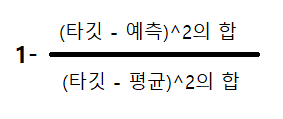

정확도처럼 R^2가 직감적으로 얼마나 좋은지 이해하기는 어렵다. 타깃과 예측한 값 사이의 차이를 구해보면 어느정도 예측이 벗어났는지 가늠하기 좋다. 

mean_absolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환한다.

In [ ]:
from sklearn.metrics import mean_absolute_error # 타깃과 예측의 절댓값 오차를 평균하여 변환

# 테스트 세트에 대한 예측을 만든다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

결과에서 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있다. 지금까지는 훈련 세트를 사용해 모델을 훈련하고 테스트 세트로 모델을 평가했었다. 그런데 훈련 세트를 사용해 평가해보면 어떻게 될까? 즉 score() 메소드에 훈련 세트를 전달해서 점수를 출력해 보는것이다. 점수를 출력해보자.

In [ ]:
print("훈련 세트 정확도:",knr.score(train_input, train_target))

### 과대적합과 과소적합

만약에 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서 점수가 굉장히 나쁘다면? 모델이 훈련 세트에 **과대적합(overfitting)** 되었다고 말한다. 

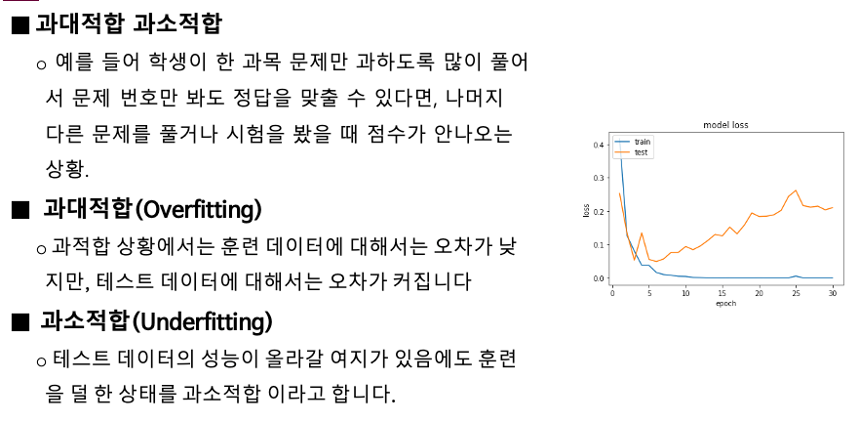

반대로 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 낮은 경우는 어떨까? 이런 경우를 모델이 훈련 세트에 **과소적합(underfitting)** 되었다고 말한다. 


In [ ]:
# 과대적합 vs 과소적합
knr.n_neighbors = 3

# 모델을 다시 훈련시킵니다.
knr.fit(train_input, train_target)

print("훈련 세트 정확도:", knr.score(train_input, train_target))
print("테스트 세트 정확도:",knr.score(test_input, test_target))

예상대로 테스트 세트의 점수는 훈련 세트보다 낮아졌으므로 과소적합 문제를 해결한 듯 싶다. 또 두 수의 차이가 그렇게 큰 것도 아니니 과대적합이 된것도 아닌듯 하다.


In [ ]:
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)

# n = 1,5,10일 때 예측 결과를 그래프로 그립니다
for n in [1,5,10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  # 지정한 범위 x에 대한 예측을 구합니다.
  prediction = knr.predict(x)

plt.scatter(train_input, train_target)
plt.plot(x, prediction)
plt.title('n_neighbors = {}'.format(n))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()